## Ejercicio de autoML con Pycaret

### Primera parte del ejercicio

In [16]:
#! pip install pycaret # Quite large depencies to install !
import pycaret
pycaret.__version__

'2.0.0'

In [17]:
import numpy as np
import pandas as pd
import pycaret
## importa el modelo de clasificacion de Pycaret
from pycaret.classification import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
## Carga los datos de train
## resulta que los datos de train los tenia en un csv... 
## yo asumi que venian de los datasets de ejemplo
## de pycaret, y los importe desde ahi directamente.
from pycaret.datasets import get_data
data = get_data('train')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocesamiento de los datos con Pycaret

In [19]:
## Carga de los datos(clf1) en Pycaret, como target "Survived", imputacion mediante la media
#variables categoricas['Sex','Embarked'],ignorar variables:['PassengerId','Name','Ticket','Cabin']

## segun la correccion es correcto, lo unico que propone distinto
## es la opcion silent=True
##
## segun la documentacion:
## silent: bool, default = False
## When set to True, confirmation of data types is not required. 
## All preprocessing will be performed assuming automatically 
## inferred data types. 
## Not recommended for direct use except for established pipelines.
## https://pycaret.org/classification/


clf1 = setup(data = data, 
             target = 'Survived',
              numeric_imputation = 'mean',
             session_id=123,
             categorical_features  = ['Sex','Embarked'],
             ignore_features = ['PassengerId','Name','Ticket','Cabin']) 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Entrenamiento de modelos

In [20]:
## Compara los diferentes modelos entre si
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.8186,0.8466,0.7112,0.7986,0.7500,0.6087,0.6133,0.1086
1,CatBoost Classifier,0.8121,0.8584,0.6734,0.8041,0.7290,0.5882,0.5960,2.3519
2,Logistic Regression,0.8056,0.8536,0.7281,0.7552,0.7374,0.5840,0.5877,0.0954
3,Light Gradient Boosting Machine,0.8025,0.8404,0.7067,0.7639,0.7303,0.5754,0.5798,0.0874
4,Ridge Classifier,0.8024,0.0000,0.7031,0.7621,0.7285,0.5743,0.5778,0.0064
5,Ada Boost Classifier,0.8008,0.8404,0.7449,0.7413,0.7399,0.5790,0.5823,0.0921
6,Linear Discriminant Analysis,0.8008,0.8486,0.7031,0.7584,0.7267,0.5711,0.5745,0.0116
7,Random Forest Classifier,0.7913,0.8234,0.6817,0.7584,0.7135,0.5506,0.5565,0.1324
8,Extreme Gradient Boosting,0.7881,0.8290,0.7027,0.7315,0.7151,0.5468,0.5486,0.0813
9,Extra Trees Classifier,0.7801,0.8221,0.6947,0.7224,0.7069,0.5313,0.5327,0.2895


# Selección del mejor modelo

In [21]:
## Selecciona el mejor modelo  
print(best_model)
## aca por mas que Gradient Boosting Classifier dio los mejores
## resultados, la profesora elige Light Gradient Boosting Machine
## por motivos pedagogicos.
##
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.8841,0.7917,0.8261,0.8085,0.6947,0.6951
1,0.8254,0.8248,0.7500,0.7826,0.7660,0.6268,0.6272
2,0.7778,0.8600,0.6250,0.7500,0.6818,0.5132,0.5183
3,0.8226,0.8517,0.6087,0.8750,0.7179,0.5945,0.6154
4,0.6935,0.6996,0.5000,0.6316,0.5581,0.3284,0.3336
5,0.8065,0.8498,0.7500,0.7500,0.7500,0.5921,0.5921
6,0.8548,0.8728,0.7917,0.8261,0.8085,0.6917,0.6921
7,0.7742,0.8125,0.7917,0.6786,0.7308,0.5383,0.5430
8,0.7742,0.8432,0.6250,0.7500,0.6818,0.5090,0.5141
9,0.8387,0.9057,0.8333,0.7692,0.8000,0.6652,0.6667


### Segunda parte del ejercicio

# Optimización de hiperparametros

In [22]:
## Optimiza el mejor modelo
## el mejor modelo era lgbm, asi que vamos a tunearlo
tuned_lgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.8873,0.7500,0.8182,0.7826,0.6580,0.6595
1,0.8571,0.8173,0.7500,0.8571,0.8000,0.6897,0.6934
2,0.8095,0.8889,0.6667,0.8000,0.7273,0.5828,0.5885
3,0.8387,0.8662,0.6957,0.8421,0.7619,0.6416,0.6483
4,0.7419,0.7149,0.5417,0.7222,0.6190,0.4299,0.4401
5,0.7903,0.8213,0.6250,0.7895,0.6977,0.5405,0.5491
6,0.8387,0.8668,0.7500,0.8182,0.7826,0.6548,0.6564
7,0.8226,0.8229,0.7500,0.7826,0.7660,0.6232,0.6236
8,0.7419,0.8399,0.5833,0.7000,0.6364,0.4389,0.4433
9,0.8548,0.8991,0.8333,0.8000,0.8163,0.6964,0.6968


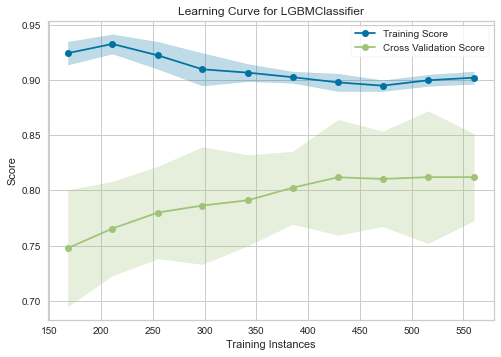

In [23]:
plot_model(estimator = tuned_lgbm, plot = 'learning')

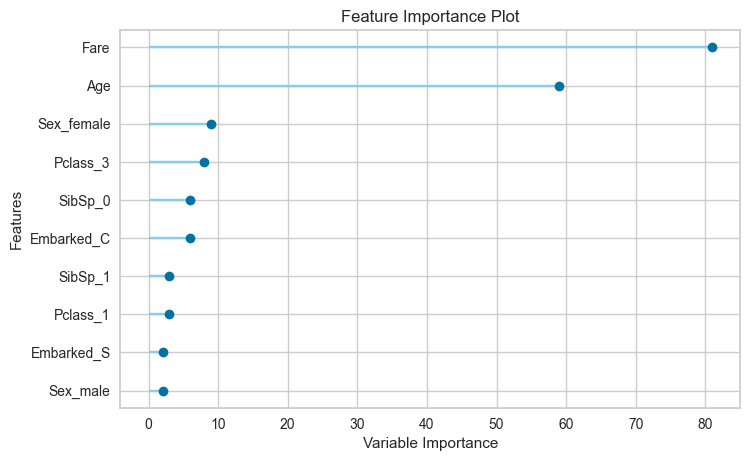

In [25]:
## Imprime la grafica que describe la importancia de las variables
plot_model(tuned_lgbm, plot='feature')

## las variables mas importantes: Fare(tarifa) y edad para 
## prediccion de la supervivencia...

Confusion matrix at its ease!

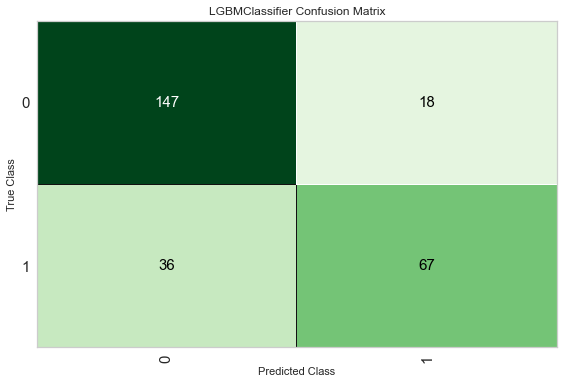

In [26]:
plot_model(estimator = tuned_lgbm, plot = 'confusion_matrix')

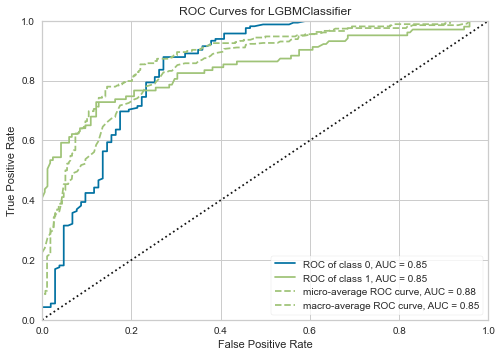

In [28]:
## Imprime la curva AUC
plot_model(tuned_lgbm, plot='auc')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=80,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=30, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.5, reg_lambda=0.7, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


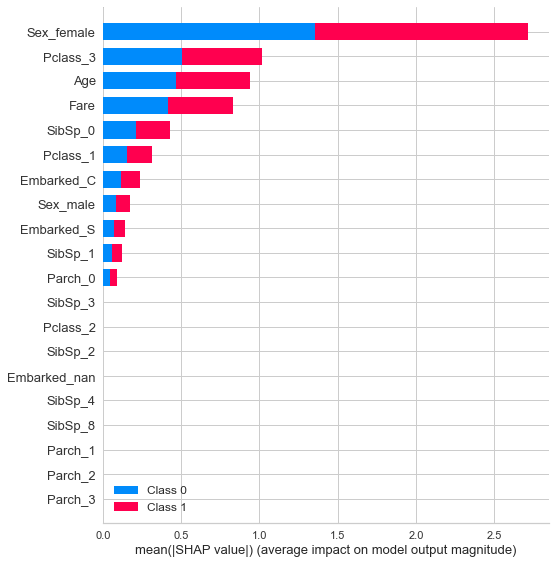

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [35]:
interpret_model(tuned_lgbm)
## me daba un error por no tener instalado el modulo shap
## luego de instalarlo lo grafica correctamente.
##evaluate_model(tuned_lgbm)

In [31]:
## Guarda tu modelo
save_model(tuned_lgbm,'Final lgbm Model 19Oct2020')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=80,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=30, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.5, reg_lambda=0.7, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=Final lgbm Model 19Oct2020, model_only=False, verbose=True)
INFO:logs:Adding model into prep_pipe
INFO:logs:Final lgbm Model 19Oct2020.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Sex', 'Embarked'],
                                      display_types=True,
                                      features_todrop=['PassengerId', 'Name',
                   

Transformation Pipeline and Model Succesfully Saved


# Predicción con datos de test

In [32]:
test = pd.read_csv('test.csv') 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
## Haz la prediccion con tu modelo sobre los datos de test
## la prediccion con el modelo
predictions = predict_model(tuned_lgbm, data=test)
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.1045
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.2419
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0769
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.2629
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.2127


In [40]:
sub   = pd.read_csv('gender_submission.csv')

# Obtención de resultados en DataFrame y guardar el modelo

In [41]:
sub['Survived'] = round(predictions['Score']).astype(int)
sub.to_csv('submission.csv',index=False)

Combine su modelo con otro algoritmo.

In [ ]:
xgb   = create_model('xgboost');    
logr  = create_model('lr');   
## Combina tu modelo con los modelos de xgboost y lr

######## NUEVO ########
## PARA COMBINAR>: funcion blend_models

blend = blend_models(estimator_list = [tuned_lgbm, xgb, logr])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7460,0.8397,0.6667,0.6667,0.6667,0.4615
1,0.8571,0.8397,0.7083,0.8947,0.7907,0.6845
2,0.7460,0.8376,0.7083,0.6538,0.6800,0.4700
3,0.7581,0.8144,0.5652,0.7222,0.6341,0.4574
4,0.8710,0.8575,0.8333,0.8333,0.8333,0.7281
5,0.8387,0.8860,0.6667,0.8889,0.7619,0.6437
6,0.8065,0.8739,0.7500,0.7500,0.7500,0.5921
7,0.8387,0.8333,0.6667,0.8889,0.7619,0.6437
8,0.8226,0.8761,0.7083,0.8095,0.7556,0.6173
9,0.7258,0.7752,0.7083,0.6296,0.6667,0.4352


IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:02:04
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 10 of 10
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7937,0.0,0.7083,0.7391,0.7234,0.5590
1,0.8254,0.0,0.6250,0.8824,0.7317,0.6078
2,0.7778,0.0,0.7083,0.7083,0.7083,0.5288
3,0.7742,0.0,0.5652,0.7647,0.6500,0.4888
4,0.8548,0.0,0.7917,0.8261,0.8085,0.6917
5,0.8548,0.0,0.6667,0.9412,0.7805,0.6767
6,0.8548,0.0,0.7917,0.8261,0.8085,0.6917
7,0.7903,0.0,0.5417,0.8667,0.6667,0.5253
8,0.8065,0.0,0.6250,0.8333,0.7143,0.5724
